# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nfl_data_py as nfl

# Play by Play Data

In [108]:
columns = None
years = [2023]
df_play = nfl.import_pbp_data(years, columns, downcast=True, cache=False, alt_path=None)

2023 done.
Downcasting floats.


## Column Exploration

In [103]:
s = "season"
for col in list(df_play.columns):
    if s in col:
        print(col)

season_type
season


In [106]:
df_play["season_type"].head()

0    REG
1    REG
2    REG
3    REG
4    REG
Name: season_type, dtype: object

# Who Throws Deep?

Finding average depth of target (adot) for quarterbacks.

Grab only the pass plays. Note, in pandas, you should use the `&` operator for element-wise logical AND operations.

In [4]:
df_pass_plays = df_play[(df_play["play_type"] == "pass") & (df_play["air_yards"].notna())]

## ADOT by QB

Group by 'passer_id' and 'passer', then aggregate air yards by count and mean.

In [5]:
grouped = df_pass_plays.groupby(['passer_id', 'passer']).agg({"air_yards": ["count", "mean"]})

Creating a refined data frame where we only keep players who have attempted over 100 passes. We sort, descending, by adot.

In [6]:
grouped.columns = list(map("_".join, grouped.columns.values))
sort_crit = "air_yards_count > 100"
print(grouped.query(sort_crit).sort_values(by="air_yards_mean", ascending=[False]).to_string())

                                air_yards_count  air_yards_mean
passer_id  passer                                              
00-0039152 W.Levis                          150       10.193334
00-0029701 R.Tannehill                      157        9.375796
00-0033537 D.Watson                         170        9.370588
00-0035228 K.Murray                         107        9.308412
00-0039163 C.Stroud                         385        9.241558
00-0036264 J.Love                           370        8.967567
00-0036389 J.Hurts                          358        8.575419
00-0034855 B.Mayfield                       380        8.497369
00-0034857 J.Allen                          432        8.284722
00-0033077 D.Prescott                       370        8.270270
00-0031280 D.Carr                           372        8.223118
00-0033275 P.Walker                         110        8.200000
00-0031345 J.Garoppolo                      167        8.119761
00-0037834 B.Purdy                      

## ADOT For Receivers

In [7]:
receivers = df_pass_plays.groupby(['receiver_id', 'receiver']).agg({"air_yards": ["count", "mean"]})

In [8]:
receivers.columns = list(map("_".join, receivers.columns.values))
sort_crit = "air_yards_count > 50"
print(receivers.query(sort_crit).sort_values(by="air_yards_mean", ascending=[False]).to_string())

                            air_yards_count  air_yards_mean
receiver_id receiver                                       
00-0036261  B.Aiyuk                      65       15.107693
00-0037545  R.Shaheed                    55       14.781818
00-0030564  D.Hopkins                    83       14.674699
00-0031408  M.Evans                      91       14.274725
00-0038977  N.Dell                       75       14.266666
00-0031544  A.Cooper                     86       14.139535
00-0036196  G.Davis                      67       13.880597
00-0037239  C.Olave                     103       13.757281
00-0035640  D.Metcalf                    80       13.550000
00-0037247  G.Pickens                    73       12.945206
00-0034837  C.Ridley                     76       12.671053
00-0036912  D.Smith                      76       12.460526
00-0035676  A.Brown                     105       12.447619
00-0035662  M.Brown                      98       11.959184
00-0035216  D.Johnson                   

In [28]:
player_name = "D.Adams"
receivers.query(f"receiver == '{player_name}'")

,,air_yards_count,air_yards_mean
receiver_id,receiver,,
00-0031381,D.Adams,118,11.788136


# Sticky Stats

In [9]:
seasons = range(2016, 2023 + 1)
df_pbp = nfl.import_pbp_data(seasons) 

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [116]:
df_passes = df_pbp.query("play_type == 'pass' & air_yards.notnull()").reset_index()
df_passes = df_passes.query("season_type == 'REG'")  # remove playoff numbers

In [117]:
df_passes.head()

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,41302;40078;38540;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0
1,5,130.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",5.0,40078;38540;41302;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
2,9,216.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,34479;40111;41277;37249;41230;36089;37100;3567...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0
3,11,261.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"1 DL, 5 LB, 5 DB",3.0,34479;40111;41277;37249;41230;36089;40112;3710...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,10.0,10.0
4,13,310.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",4.0,38540;41302;35553;38582;43295;40053;43369;4011...,00-0027714;00-0032965;00-0029893;00-0026223;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0


A *long pass* is a pass that is 20+ yards, and a *short pass* as less than 20 yards.

In [118]:
df_passes["pass_length_air_yards"] = np.where(
      df_passes["air_yards"] >= 20, "long", "short"
)

In [119]:
df_passes["passing_yards"] = np.where(
          df_passes["passing_yards"].isnull(), 0,
          df_passes["passing_yards"]
        )

In [120]:
df_passes["passing_yards"].describe()

count    137728.000000
mean          7.173211
std           9.645163
min         -20.000000
25%           0.000000
50%           5.000000
75%          11.000000
max          98.000000
Name: passing_yards, dtype: float64

## Passing yards by pass type

In [121]:
df_passes.query("pass_length_air_yards == 'short'")["passing_yards"].describe()

count    121571.000000
mean          6.515106
std           7.689699
min         -20.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          95.000000
Name: passing_yards, dtype: float64

In [122]:
df_passes.query("pass_length_air_yards == 'long'")["passing_yards"].describe()

count    16157.000000
mean        12.125023
std         17.897650
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max         98.000000
Name: passing_yards, dtype: float64

## EPA by pass type

In [123]:
df_passes.query("pass_length_air_yards == 'short'")["epa"].describe()

count    121570.000000
mean          0.114528
std           1.429945
min         -13.031219
25%          -0.609115
50%          -0.006633
75%           0.952334
max           8.241420
Name: epa, dtype: float64

In [124]:
df_passes.query("pass_length_air_yards == 'long'")["epa"].describe()

count    16157.000000
mean         0.372836
std          2.183626
min        -10.477921
25%         -0.832401
50%         -0.469055
75%          2.131562
max          8.789743
Name: epa, dtype: float64

# Plotting

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

## Yards Gained on Passes

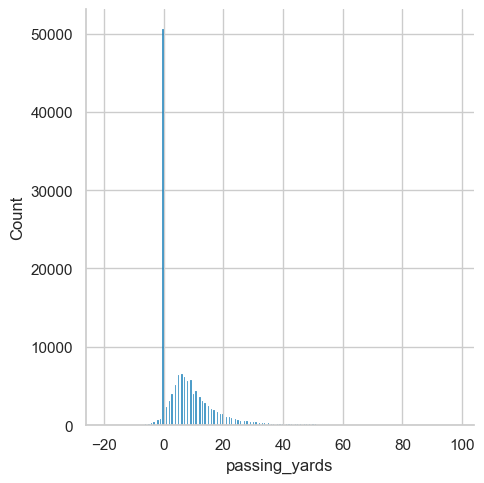

In [126]:
sns.displot(data=df_passes, x="passing_yards");
plt.show();

## Yards Gained on Short Passes

In [127]:
sns.set_theme(style="whitegrid", palette="colorblind")
df_short_passes = df_passes.query("pass_length_air_yards == 'short'")

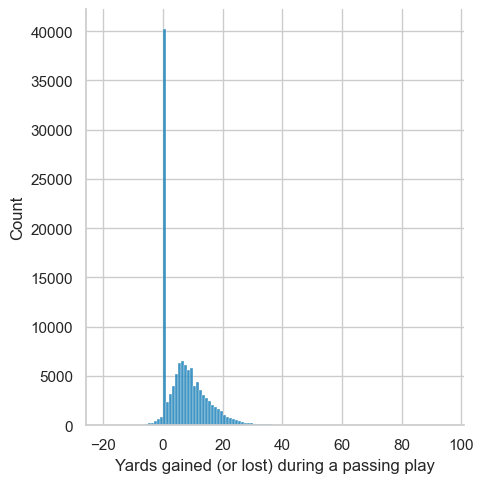

In [128]:
pass_hist_short = sns.displot(data=df_short_passes, binwidth=1, x="passing_yards")
pass_hist_short.set_axis_labels("Yards gained (or lost) during a passing play", "Count");
plt.show();

# Yards Gained on Long Passes

In [129]:
sns.set_theme(style="whitegrid", palette="colorblind")
df_long_passes = df_passes.query("pass_length_air_yards == 'long'")

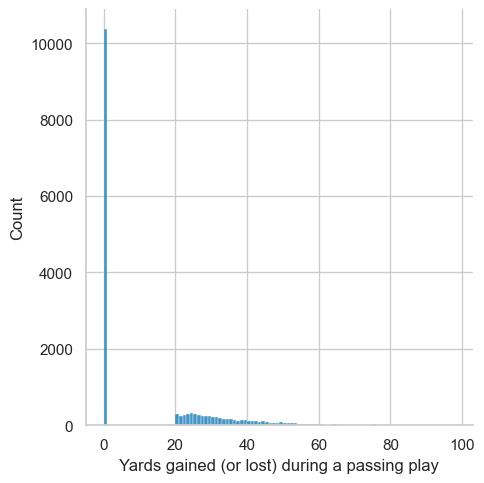

In [130]:
pass_hist_long = sns.displot(data=df_long_passes, binwidth=1, x="passing_yards")
pass_hist_long.set_axis_labels("Yards gained (or lost) during a passing play", "Count");
plt.show();

# Boxplot of Yards Gained (Passing)

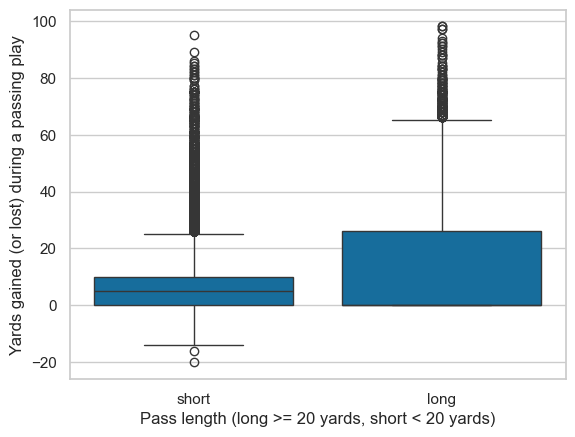

In [131]:
pass_boxplot = sns.boxplot(data=df_passes, x="pass_length_air_yards", y="passing_yards");
pass_boxplot.set(
    xlabel="Pass length (long >= 20 yards, short < 20 yards)", 
    ylabel="Yards gained (or lost) during a passing play",
);
plt.show();

# Player Stability for Passing Yards

## Passing Attempts and Yards per Attempt 

In [132]:
df_passes_by_season = df_passes.groupby(["passer_id", "passer", "season"]).agg({"passing_yards": ["mean", "count"]})
df_passes_by_season

passing_yards      
                                        mean count
passer_id  passer       season                    
00-0019596 T.Brady      2016        8.245939   431
                        2017        7.877797   581
                        2018        7.667253   568
                        2019        6.618271   613
                        2020        7.645215   606
...                                      ...   ...
00-0038598 J.Hall       2023       10.100000    10
00-0039150 B.Young      2023        5.362857   350
00-0039152 W.Levis      2023        6.946667   150
00-0039163 C.Stroud     2023        8.483117   385
00-0039164 A.Richardson 2023        6.869048    84

[808 rows x 2 columns]

Remove the season of a player, if they have less than 100 passing attemtps.

In [133]:
df_passes_by_season = df_passes_by_season.groupby(level=["passer_id", "passer", "season"]).filter(lambda x: x[('passing_yards', 'count')] >= 100)
df_passes_by_season

passing_yards      
                                               mean count
passer_id  passer              season                    
00-0019596 T.Brady             2016        8.245939   431
                               2017        7.877797   581
                               2018        7.667253   568
                               2019        6.618271   613
                               2020        7.645215   606
...                                             ...   ...
00-0038579 A.O'Connell         2023        6.707865   178
00-0038583 D.Thompson-Robinson 2023        4.009346   107
00-0039150 B.Young             2023        5.362857   350
00-0039152 W.Levis             2023        6.946667   150
00-0039163 C.Stroud            2023        8.483117   385

[338 rows x 2 columns]

In [134]:
df_passes_by_season.columns = list(map("_".join, df_passes_by_season.columns.values))
df_passes_by_season.rename(columns={'passing_yards_mean': 'ypa', 'passing_yards_count': 'n'}, inplace=True)

In [135]:
df_passes_by_season.sort_values(by=["ypa"], ascending=False).head(20)

,,,ypa,n
passer_id,passer,season,,
00-0029701,R.Tannehill,2019,9.689046,283
00-0023682,R.Fitzpatrick,2018,9.617887,246
00-0037834,B.Purdy,2023,9.475247,303
00-0026143,M.Ryan,2016,9.258427,534
00-0036442,J.Burrow,2021,8.901545,518
00-0033537,D.Watson,2020,8.898524,542
00-0036212,T.Tagovailoa,2022,8.892231,399
00-0031345,J.Garoppolo,2017,8.863636,176
00-0033873,P.Mahomes,2018,8.803109,579


## Passing Yards by Season

In [136]:
df_passing_yards_by_season = df_passes.groupby(["passer_id", "passer", "season"]).agg({"passing_yards": ["sum", "count"]})
df_passing_yards_by_season

passing_yards      
                                         sum count
passer_id  passer       season                    
00-0019596 T.Brady      2016          3554.0   431
                        2017          4577.0   581
                        2018          4355.0   568
                        2019          4057.0   613
                        2020          4633.0   606
...                                      ...   ...
00-0038598 J.Hall       2023           101.0    10
00-0039150 B.Young      2023          1877.0   350
00-0039152 W.Levis      2023          1042.0   150
00-0039163 C.Stroud     2023          3266.0   385
00-0039164 A.Richardson 2023           577.0    84

[808 rows x 2 columns]

In [137]:
df_passing_yards_by_season = df_passing_yards_by_season.groupby(level=["passer_id", "passer", "season"]).filter(lambda x: x[('passing_yards', 'sum')] >= 2000)
df_passing_yards_by_season

passing_yards      
                                      sum count
passer_id  passer    season                    
00-0019596 T.Brady   2016          3554.0   431
                     2017          4577.0   581
                     2018          4355.0   568
                     2019          4057.0   613
                     2020          4633.0   606
...                                   ...   ...
00-0037077 S.Howell  2023          3339.0   486
00-0037834 B.Purdy   2023          2871.0   303
00-0038102 K.Pickett 2022          2404.0   388
                     2023          2000.0   313
00-0039163 C.Stroud  2023          3266.0   385

[233 rows x 2 columns]

In [138]:
df_passing_yards_by_season.columns = list(map("_".join, df_passing_yards_by_season.columns.values))
df_passing_yards_by_season.rename(columns={'passing_yards_sum': 'yards', 'passing_yards_count': 'n'}, inplace=True)

In [139]:
df_passing_yards_by_season.sort_values(by=["yards"], ascending=False).head(20)

yards    n
passer_id  passer           season             
00-0019596 T.Brady          2021    5316.0  717
00-0033873 P.Mahomes        2022    5250.0  648
00-0020531 D.Brees          2016    5209.0  664
00-0022924 B.Roethlisberger 2018    5129.0  672
00-0031503 J.Winston        2019    5109.0  624
00-0033873 P.Mahomes        2018    5097.0  579
00-0036355 J.Herbert        2021    5014.0  671
00-0026143 M.Ryan           2016    4944.0  534
                            2018    4924.0  607
00-0029604 K.Cousins        2016    4917.0  603
00-0033077 D.Prescott       2019    4902.0  595
00-0026498 M.Stafford       2021    4886.0  601
00-0033873 P.Mahomes        2021    4839.0  658
00-0033537 D.Watson         2020    4823.0  542
00-0031280 D.Carr           2021    4804.0  623
00-0033873 P.Mahomes        2020    4740.0  587
00-0036355 J.Herbert        2022    4739.0  697
00-0019596 T.Brady          2022    4694.0  730
00-0033106 J.Goff           2018    4688.0  559
                            2019    4638.0  625